# Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\carlo\\Documents\\Machine-Learning\\LinearRegression'

In [3]:
ls

 El volumen de la unidad C es Windows-SSD
 El número de serie del volumen es: 9E6A-3162

 Directorio de C:\Users\carlo\Documents\Machine-Learning\LinearRegression

26/07/2024  12:07 a. m.    <DIR>          .
25/07/2024  11:28 p. m.    <DIR>          ..
25/07/2024  11:22 p. m.    <DIR>          .ipynb_checkpoints
26/07/2024  12:07 a. m.           277,073 Linear Regression.ipynb
25/07/2024  11:24 p. m.           726,209 USA_Housing.csv
               2 archivos      1,003,282 bytes
               3 dirs  586,228,072,448 bytes libres


In [4]:
homes = pd.read_csv('USA_Housing.csv')

In [5]:
homes

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [6]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [7]:
homes.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [8]:
homes.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
homes['Price']

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

C:\Users\carlo\AppData\Local\Temp\ipykernel_27380\1734328648.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(homes['Price'])


<Axes: xlabel='Price', ylabel='Density'>

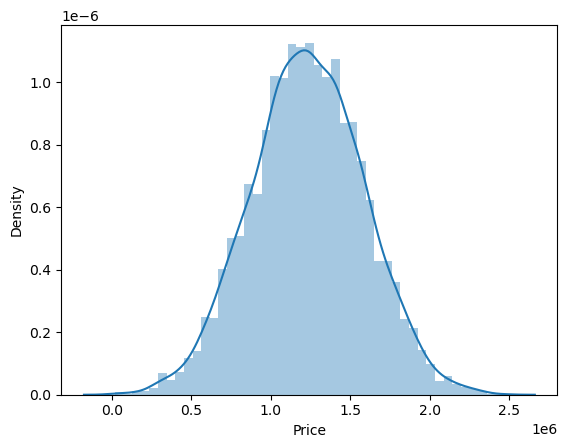

In [10]:
sns.distplot(homes['Price'])

C:\Users\carlo\AppData\Local\Temp\ipykernel_27380\1353254944.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(homes.corr())


<Axes: >

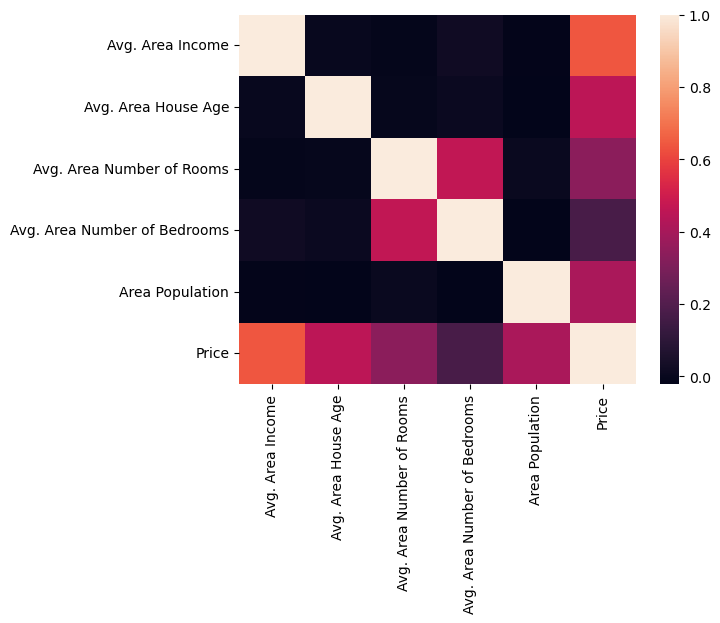

In [11]:
sns.heatmap(homes.corr())

C:\Users\carlo\AppData\Local\Temp\ipykernel_27380\151408887.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(homes.corr(), annot=True)


<Axes: >

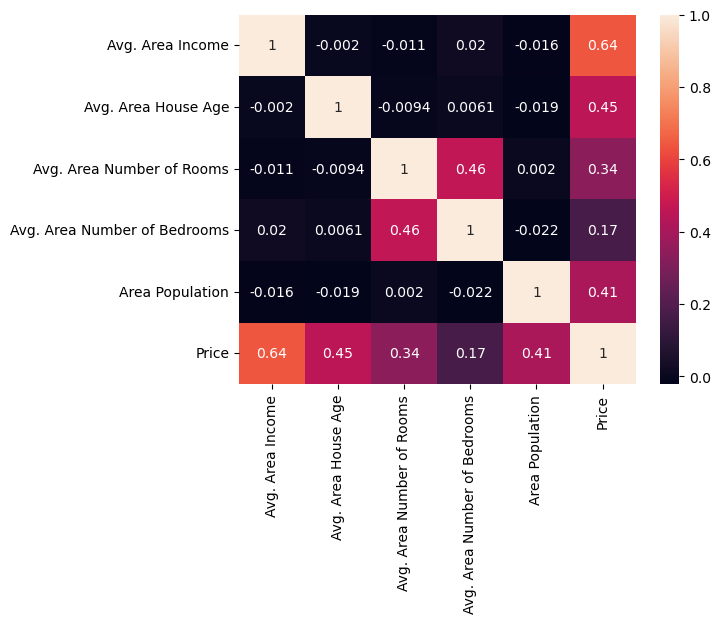

In [12]:
sns.heatmap(homes.corr(), annot=True)

## Machine Learning

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
homes.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [15]:
homes.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [16]:
X = homes[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [17]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [18]:
Y = homes['Price']

In [19]:
Y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [60]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
3563,74208.124644,6.259782,8.666717,3.38,25507.336340
1538,71112.350296,5.612677,7.419542,4.26,24134.413996
1837,63665.394418,6.729105,7.732959,3.43,44029.681816
2380,56073.892443,6.576733,6.959056,4.40,64149.680213


In [21]:
lrm = LinearRegression()

In [22]:
lrm.fit(X_train, y_train)

LinearRegression()

## Evaluate the model

In [23]:
from sklearn import metrics

In [24]:
predictions = lrm.predict(X_test)

In [25]:
predictions

array([1308536.13592605, 1237122.72746462, 1243835.62817079, ...,
       1457119.79297226, 1483428.95309313, 1047510.597372  ])

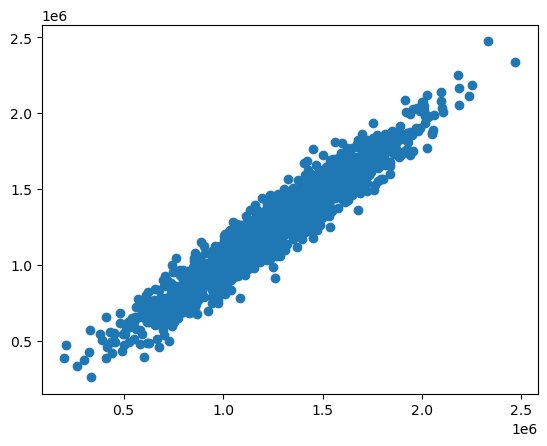

In [26]:
plt.scatter(y_test, predictions)

C:\Users\carlo\AppData\Local\Temp\ipykernel_27380\1181080564.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions)


<Axes: xlabel='Price', ylabel='Density'>

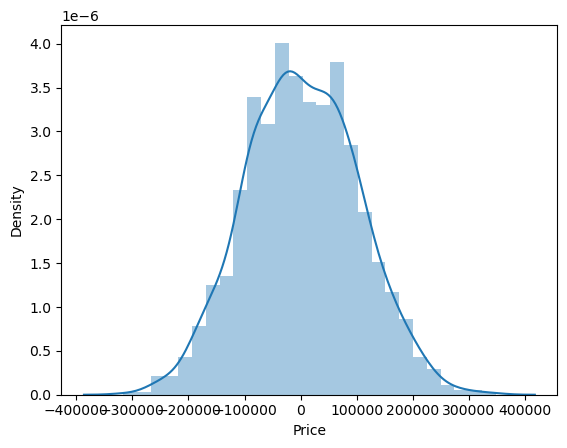

In [27]:
sns.distplot(y_test - predictions)

### MAE (Mean absolute error) - Media del valor absoluto de los errores

In [28]:
metrics.mean_absolute_error(y_test, predictions)

81135.56609336882

### MSE (Mean squared error) - Media de los errores al cuadrado

In [29]:
metrics.mean_squared_error(y_test, predictions)

10068422551.400932

### RMSE

In [30]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

100341.52954485462

# Exercise

In [31]:
data = {'TV': [230.1, 44.5, 17.2, 151.5, 180.8], 'Radio': [37.8, 39.3, 45.9, 41.3, 10.8], 'Periodico': [69.2, 45.1, 69.3, 58.5, 58.4], 'Ventas': [22.1, 10.4, 9.3, 18.5, 12.9]}

In [32]:
data

{'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
 'Radio': [37.8, 39.3, 45.9, 41.3, 10.8],
 'Periodico': [69.2, 45.1, 69.3, 58.5, 58.4],
 'Ventas': [22.1, 10.4, 9.3, 18.5, 12.9]}

In [33]:
df = pd.DataFrame(data)

In [35]:
df

,TV,Radio,Periodico,Ventas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [36]:
df.columns

Index(['TV', 'Radio', 'Periodico', 'Ventas'], dtype='object')

In [61]:
x = df[['TV', 'Radio', 'Periodico']]

In [62]:
x

,TV,Radio,Periodico
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [49]:
y = df['Ventas']

In [50]:
y

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Ventas, dtype: float64

In [135]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=5)

In [132]:
lrm = LinearRegression()

In [133]:
lrm.fit(X_train, y_train)

LinearRegression()

In [175]:
def regresion_ventas(datos):
    x = datos[['TV', 'Radio', 'Periodico']]
    y = datos['Ventas']
    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=45)
    lrm = LinearRegression()
    #lrm.fit(X_train, y_train)
    lrm.fit(x,y)
    return lrm

In [176]:
modelo_regresion = regresion_ventas(df)

In [177]:
nuevos_datos = pd.DataFrame({'TV': [200, 60, 30], 'Radio': [40,20,10], 'Periodico': [50,10,5]})

In [178]:
estimaciones_ventas = modelo_regresion.predict(nuevos_datos)

In [180]:
print("Estimaciones de ventas: ")
print(estimaciones_ventas)

Estimaciones de ventas: 
[21.54261464  8.48121675  4.16961329]
